In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import plotly
import random
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

In [2]:
#чтение csv-файла
data = pd.read_csv('Raiff_income_profit.csv', sep=',')
data.date =  pd.to_datetime(data.date, format='%d.%m.%Y')
data.head(5)

,date,Income,Profit
0,2011-03-01,78670000,34707000
1,2011-06-01,78354000,31979000
2,2011-09-01,82971000,-15351000
3,2011-12-01,74072000,8054000
4,2012-03-01,80102000,13950000
5,2012-06-01,73013000,1665000
6,2012-09-01,74449000,3900000
7,2012-12-01,78815000,-3246000


In [3]:
data.dtypes

date      datetime64[ns]
Income             int64
Profit             int64
dtype: object

In [13]:
#визуализация
r = lambda: random.randint(0,255)
traces = [] #

for col in data.columns[1:]:
    color = "rgb(" + str(r()) + ","  + str(r()) + "," + str(r()) + ")"
    trace = plotly.graph_objs.Scattergl(
        x=data.date,
        y=data[col],
        mode='lines',
        line=dict(color = color)
    )
    traces.append(trace)

layout = plotly.graph_objs.Layout(title='Plot',)
fig = plotly.graph_objs.Figure(data=traces, layout=layout)

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='dataplot')

In [5]:
def LSTM_model(dataframe, look_back):
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    #масштабирование
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    #деление выборки на тестовую (20%) и обучающую (80%)
    train, test = dataset[0:int(len(dataset) * 0.8),:], dataset[int(len(dataset) * 0.8):len(dataset),:]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    #вид [samples, time steps, features] для LSTM
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    #создание и обучение нейросети
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)
    #прогноз
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    #прогноз к первоначальному виду данных
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    #RMSE
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    return trainPredict, testPredict

def plot_predict(dataframe, trainPredict, testPredict,look_back):
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    #смещение прогноза обратно
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    #график
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
income = pd.DataFrame({0:data['Income']})
profit = pd.DataFrame({0:data['Profit']})

In [7]:
trainPredictInc1, testPredictInc1 = LSTM_model(income, 1)

Epoch 1/150
29/29 - 0s - loss: 0.0392
Epoch 2/150
29/29 - 0s - loss: 0.0292
Epoch 3/150
29/29 - 0s - loss: 0.0226
Epoch 4/150
29/29 - 0s - loss: 0.0186
Epoch 5/150
29/29 - 0s - loss: 0.0166
Epoch 6/150
29/29 - 0s - loss: 0.0153
Epoch 7/150
29/29 - 0s - loss: 0.0147
Epoch 8/150
29/29 - 0s - loss: 0.0142
Epoch 9/150
29/29 - 0s - loss: 0.0138
Epoch 10/150
29/29 - 0s - loss: 0.0135
Epoch 11/150
29/29 - 0s - loss: 0.0131
Epoch 12/150
29/29 - 0s - loss: 0.0128
Epoch 13/150
29/29 - 0s - loss: 0.0124
Epoch 14/150
29/29 - 0s - loss: 0.0120
Epoch 15/150
29/29 - 0s - loss: 0.0117
Epoch 16/150
29/29 - 0s - loss: 0.0113
Epoch 17/150
29/29 - 0s - loss: 0.0110
Epoch 18/150
29/29 - 0s - loss: 0.0106
Epoch 19/150
29/29 - 0s - loss: 0.0102
Epoch 20/150
29/29 - 0s - loss: 0.0099
Epoch 21/150
29/29 - 0s - loss: 0.0094
Epoch 22/150
29/29 - 0s - loss: 0.0092
Epoch 23/150
29/29 - 0s - loss: 0.0088
Epoch 24/150
29/29 - 0s - loss: 0.0085
Epoch 25/150
29/29 - 0s - loss: 0.0081
Epoch 26/150
29/29 - 0s - loss: 0.

In [8]:
trainPredictPro1, testPredictPro1 = LSTM_model(profit, 1)

Epoch 1/150
29/29 - 0s - loss: 0.0379
Epoch 2/150
29/29 - 0s - loss: 0.0275
Epoch 3/150
29/29 - 0s - loss: 0.0206
Epoch 4/150
29/29 - 0s - loss: 0.0158
Epoch 5/150
29/29 - 0s - loss: 0.0128
Epoch 6/150
29/29 - 0s - loss: 0.0111
Epoch 7/150
29/29 - 0s - loss: 0.0103
Epoch 8/150
29/29 - 0s - loss: 0.0100
Epoch 9/150
29/29 - 0s - loss: 0.0095
Epoch 10/150
29/29 - 0s - loss: 0.0095
Epoch 11/150
29/29 - 0s - loss: 0.0093
Epoch 12/150
29/29 - 0s - loss: 0.0092
Epoch 13/150
29/29 - 0s - loss: 0.0092
Epoch 14/150
29/29 - 0s - loss: 0.0092
Epoch 15/150
29/29 - 0s - loss: 0.0090
Epoch 16/150
29/29 - 0s - loss: 0.0090
Epoch 17/150
29/29 - 0s - loss: 0.0089
Epoch 18/150
29/29 - 0s - loss: 0.0088
Epoch 19/150
29/29 - 0s - loss: 0.0088
Epoch 20/150
29/29 - 0s - loss: 0.0087
Epoch 21/150
29/29 - 0s - loss: 0.0087
Epoch 22/150
29/29 - 0s - loss: 0.0085
Epoch 23/150
29/29 - 0s - loss: 0.0085
Epoch 24/150
29/29 - 0s - loss: 0.0085
Epoch 25/150
29/29 - 0s - loss: 0.0084
Epoch 26/150
29/29 - 0s - loss: 0.

In [9]:
trainPredictInc4, testPredictInc4 = LSTM_model(income, 4)

Epoch 1/150
26/26 - 0s - loss: 0.0709
Epoch 2/150
26/26 - 0s - loss: 0.0525
Epoch 3/150
26/26 - 0s - loss: 0.0397
Epoch 4/150
26/26 - 0s - loss: 0.0320
Epoch 5/150
26/26 - 0s - loss: 0.0247
Epoch 6/150
26/26 - 0s - loss: 0.0206
Epoch 7/150
26/26 - 0s - loss: 0.0180
Epoch 8/150
26/26 - 0s - loss: 0.0158
Epoch 9/150
26/26 - 0s - loss: 0.0145
Epoch 10/150
26/26 - 0s - loss: 0.0135
Epoch 11/150
26/26 - 0s - loss: 0.0125
Epoch 12/150
26/26 - 0s - loss: 0.0119
Epoch 13/150
26/26 - 0s - loss: 0.0111
Epoch 14/150
26/26 - 0s - loss: 0.0104
Epoch 15/150
26/26 - 0s - loss: 0.0099
Epoch 16/150
26/26 - 0s - loss: 0.0093
Epoch 17/150
26/26 - 0s - loss: 0.0085
Epoch 18/150
26/26 - 0s - loss: 0.0079
Epoch 19/150
26/26 - 0s - loss: 0.0074
Epoch 20/150
26/26 - 0s - loss: 0.0067
Epoch 21/150
26/26 - 0s - loss: 0.0063
Epoch 22/150
26/26 - 0s - loss: 0.0057
Epoch 23/150
26/26 - 0s - loss: 0.0053
Epoch 24/150
26/26 - 0s - loss: 0.0048
Epoch 25/150
26/26 - 0s - loss: 0.0044
Epoch 26/150
26/26 - 0s - loss: 0.

In [10]:
trainPredictPro4, testPredictPro4 = LSTM_model(profit, 4)

Epoch 1/150
26/26 - 0s - loss: 0.0505
Epoch 2/150
26/26 - 0s - loss: 0.0332
Epoch 3/150
26/26 - 0s - loss: 0.0217
Epoch 4/150
26/26 - 0s - loss: 0.0152
Epoch 5/150
26/26 - 0s - loss: 0.0116
Epoch 6/150
26/26 - 0s - loss: 0.0098
Epoch 7/150
26/26 - 0s - loss: 0.0089
Epoch 8/150
26/26 - 0s - loss: 0.0084
Epoch 9/150
26/26 - 0s - loss: 0.0082
Epoch 10/150
26/26 - 0s - loss: 0.0079
Epoch 11/150
26/26 - 0s - loss: 0.0078
Epoch 12/150
26/26 - 0s - loss: 0.0076
Epoch 13/150
26/26 - 0s - loss: 0.0074
Epoch 14/150
26/26 - 0s - loss: 0.0072
Epoch 15/150
26/26 - 0s - loss: 0.0070
Epoch 16/150
26/26 - 0s - loss: 0.0069
Epoch 17/150
26/26 - 0s - loss: 0.0067
Epoch 18/150
26/26 - 0s - loss: 0.0065
Epoch 19/150
26/26 - 0s - loss: 0.0066
Epoch 20/150
26/26 - 0s - loss: 0.0062
Epoch 21/150
26/26 - 0s - loss: 0.0062
Epoch 22/150
26/26 - 0s - loss: 0.0061
Epoch 23/150
26/26 - 0s - loss: 0.0057
Epoch 24/150
26/26 - 0s - loss: 0.0056
Epoch 25/150
26/26 - 0s - loss: 0.0056
Epoch 26/150
26/26 - 0s - loss: 0.

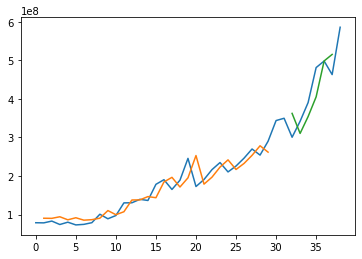

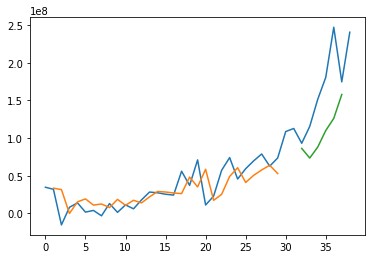

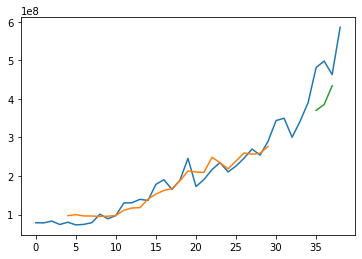

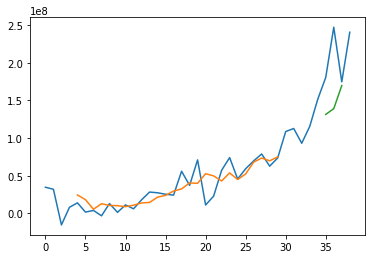

In [11]:
plot_predict(income, trainPredictInc1, testPredictInc1, 1)
plot_predict(profit, trainPredictPro1, testPredictPro1, 1)
plot_predict(income, trainPredictInc4, testPredictInc4, 4)
plot_predict(profit, trainPredictPro4, testPredictPro4, 4)